downloaded from JHU, updated daily (as csv file)

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

This data is simply cumulative confirmed cases 

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime

import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from copy import copy

import matplotlib.ticker as ticker
from itertools import cycle

import seaborn as sns



In [2]:
# Convert string to datetime format
def convert_date(date_list):
    dates=[]
    for ii in date_list: 
        dates.append(datetime.strptime(ii, '%m/%d/%y'))
    return dates

# Exponential function with 3 parameters
def exp_func(x,a,b,c):
    y = a*np.exp(b*x+c)
    return y

In [4]:
fs=36

In [5]:
#df = pd.read_csv('time_series_2019-ncov-Confirmed-2020-3-17-1515.csv')
df = pd.read_csv('time_series_2019-ncov-Confirmed-2020-3-18-1238.csv')

In [57]:
df_italy = df[df['Country/Region'] == 'Italy']
df_italy = df_italy.set_index('Country/Region', drop = True) # set pandas dataframe index to country

data_italy = df_italy.loc['Italy','2/2/20':'3/17/20']

In [58]:
df_italy.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,NaN,43.0,12.0,0,0,0,0,0,0,0,...,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506


In [59]:
b = data.values
b.astype('f')  # convert to float 'f' instead of object 'O'

array([  60.,   68.,   74.,   98.,  118.,  149.,  217.,  262.,  402.,
        518.,  583.,  959., 1281., 1663., 2179., 2727., 3499., 4632.,
       6421.], dtype=float32)

In [60]:
data.index

Index(['2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20'],
      dtype='object')

In [61]:
def plot_cumsum(data,title='',**kwargs):
    if 'fig' in kwargs.keys():
        fig = kwargs['fig']
        ax = fig.gca()
    else:
        fig,ax = plt.subplots(1,1,figsize=(20,5))

    dates = convert_date(data.index)
    dates_future = np.arange(np.min(dates),datetime(2020, 3, 21, 0, 0),dtype='datetime64[D]')

    # fit
    x = np.arange(len(dates))
    (a,b,c),_ = curve_fit(exp_func, x, data.values.astype('f'),  p0=(4, 0.1,20),bounds=[(0,0,-10),(10,2,20)],maxfev=100000)
    print(a,b,c)

    tick_spacing = 1

    plt.style.use('seaborn')

    x_future = np.arange(len(dates_future))

    # Plot
    
    ax.plot(dates_future,exp_func(x_future,a,b,c),'o--',linewidth=3,label="prediction"+r' (fit $a \cdot e^{b \cdot x+c}$,'+' b='+str(np.round(b,3))+')')
    ax.plot(dates,data.values,'D-',color='black',linewidth=5,label='data')


    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.set_xlabel('Calendar Date',fontsize=fs)
    ax.set_ylabel('Cumulative Confirmed Cases',fontsize=fs)
    ax.set_ylim(-500,)
    ax.set_title(title+' Cumulative Cases',fontsize=fs)
    ax.legend(fontsize=fs)
    
    
    return fig

0.894770542305868 0.1720779369473695 2.949490775402735


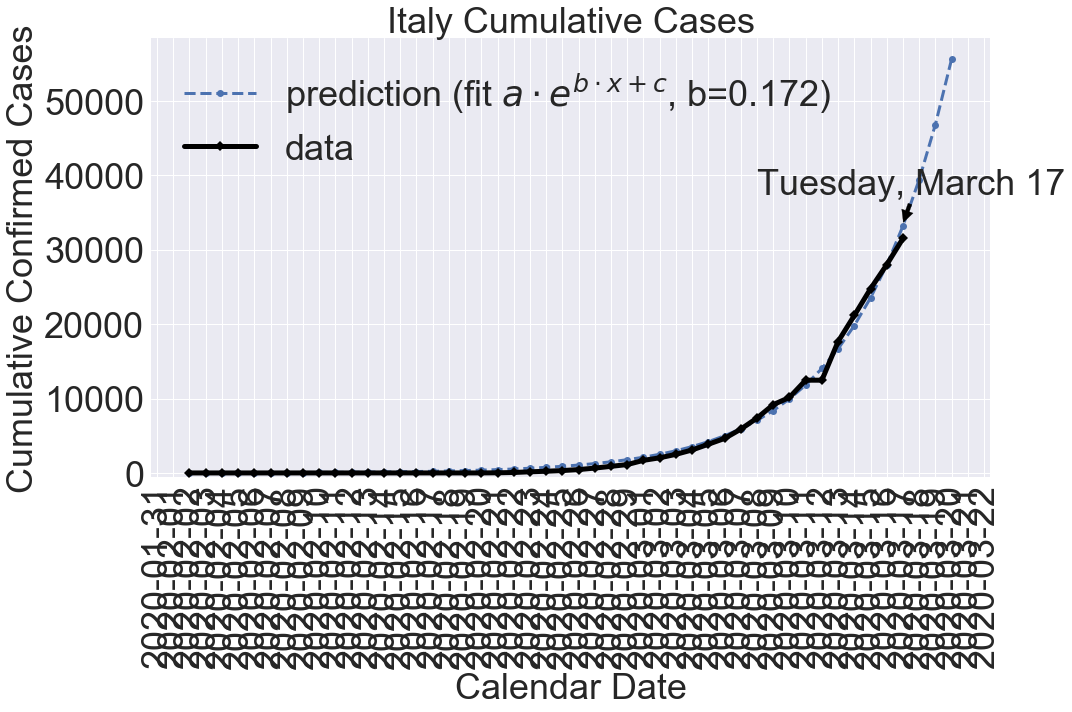

In [62]:
data = data_italy

fig,ax = plt.subplots(1,1,figsize=(15,10))
fig = plot_cumsum(data,title='Italy',fig=fig)

ax = fig.gca()
# plot arrow
#ax.arrow(x=dates[-1], y=data.values[-1]+5000+10000,dx= 0,dy=-10000,width=0.1,shape='full',head_width=0.5,head_length=2500,facecolor='midnightblue')
dates = convert_date(data_italy.index)
ax.annotate('Tuesday, March 17', xy=(dates[-1], data.values[-1]+2000), xytext=(dates[-10], data.values[-1]+5000+1000),
        arrowprops=dict(facecolor='black', shrink=0.05),fontsize=fs)

plt.tight_layout()

In [29]:
data.values[-1]

31506

In [27]:
# Now apply this across multiple countries

In [42]:
df_us = df[df['Country/Region'] == 'US']
df_us = df_us.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_us = df_us.drop(columns=['Lat','Long'])

data_us = df_us.loc['US','2/28/20':'3/17/20']


In [43]:
df_cumsum=data_us.sum(axis=0)
df_cumsum

2/28/20      60
2/29/20      68
3/1/20       74
3/2/20       98
3/3/20      118
3/4/20      149
3/5/20      217
3/6/20      262
3/7/20      402
3/8/20      518
3/9/20      583
3/10/20     959
3/11/20    1281
3/12/20    1663
3/13/20    2179
3/14/20    2727
3/15/20    3499
3/16/20    4632
3/17/20    6421
dtype: int64

1.0858589138246562 0.27702722441680766 3.6793961679506997


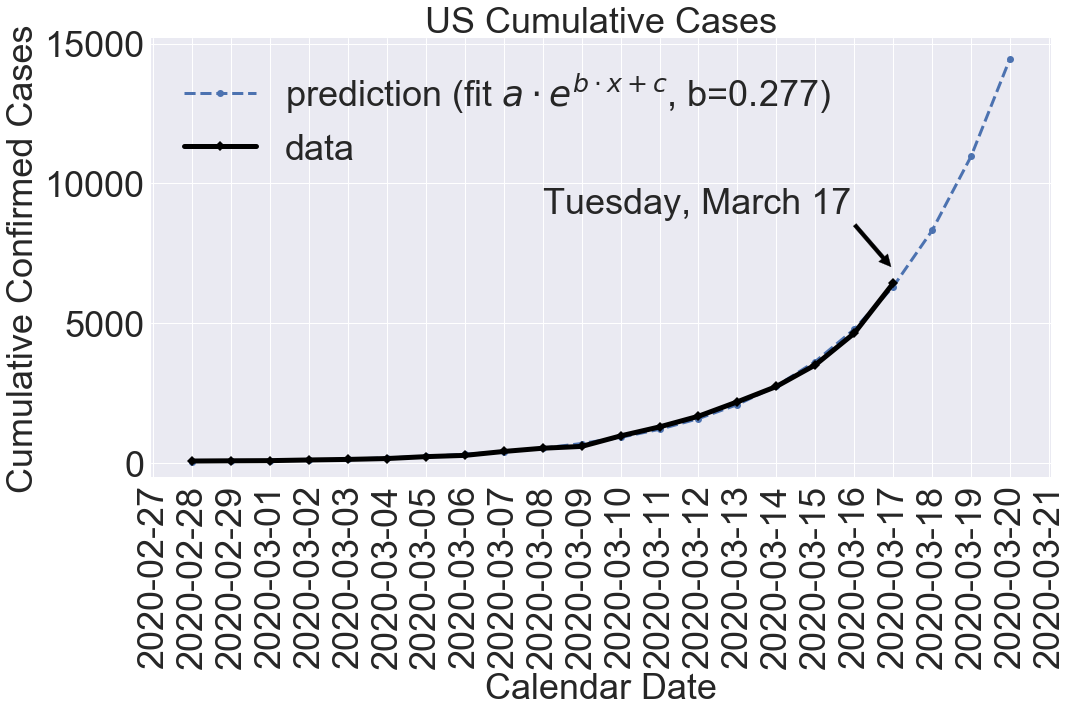

In [56]:

fig,ax = plt.subplots(1,1,figsize=(15,10))
fig = plot_cumsum(df_cumsum,title='US',fig=fig)
data = df_cumsum
ax = fig.gca()
# plot arrow
#ax.arrow(x=dates[-1], y=data.values[-1]+5000+10000,dx= 0,dy=-10000,width=0.1,shape='full',head_width=0.5,head_length=2500,facecolor='midnightblue')
ax.annotate('Tuesday, March 17', xy=(dates[-1], data.values[-1]+500), xytext=(dates[-10], data.values[-1]+500+2000),
        arrowprops=dict(facecolor='black', shrink=0.05),fontsize=fs) #  + ' ('+str(data.values[-1]) +')'

plt.tight_layout()
fig.savefig(datetime.now().strftime("%Y-%m-%d-%H%M")+'-US.png')

In [19]:
dt1 = datetime.strptime('2/23/20', '%m/%d/%y')
dt1

datetime.datetime(2020, 2, 23, 0, 0)

In [31]:
a.index

Index(['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20'],
      dtype='object')

In [49]:
str(datetime.today())

'2020-03-18 12:46:21.248656'

'2020-03-18-12:48'